## Bokeh

In [3]:
from bokeh.plotting import figure, show, output_notebook

In [4]:
output_notebook()

Loading BokehJS ...

In [5]:
# Sample data
x = [0, 1, 2, 3, 4, 5]
y = [i**2 for i in x]

# Create Bokeh figure
p = figure(title="Simple Line Plot", x_axis_label='x', y_axis_label='y')

# Add a line renderer
p.line(x, y, line_width=2)

# Show the plot in a browser
show(p)

# Plotting Examples

In [1]:
from conflict_monitoring_ntl.case_studies import CaseStudiesUrban
from conflict_monitoring_ntl.viz import plot_map_with_shape
from conflict_monitoring_ntl.satellites import SDGSat

import numpy as np
import folium

In [2]:
los_angeles = CaseStudiesUrban.LOS_ANGELES
gdf = los_angeles.gdf
date_range = los_angeles.get_date_range(days=1)

In [3]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
m = plot_map_with_shape(gdf, is_layer_control=False)

In [5]:
sdgsat = SDGSat()
sdgsat_df = sdgsat.raster(gdf, date_range)

In [6]:
sdgsat_df.rio.crs.to_epsg()

4326

In [7]:
left, bottom, right, top = sdgsat_df.rio.bounds()
bounds = [[bottom, left], [top, right]]
bounds

[[33.838334018501946, -118.53801269612491],
 [34.27207354554239, -118.01706575151047]]

In [8]:
sdgsat_patch = sdgsat_df["HDR"][0].to_numpy()

In [9]:
img = sdgsat_patch / np.nanmax(sdgsat_patch)  # normalize

In [10]:
_ = folium.raster_layers.ImageOverlay(
    image=img,
    bounds=bounds,
    name="Raster Overlay",
    interactive=True,
    mercator_project=True,
    colormap=lambda x: (x, x, x, 1)
).add_to(m)

In [11]:
_ = folium.LayerControl().add_to(m)


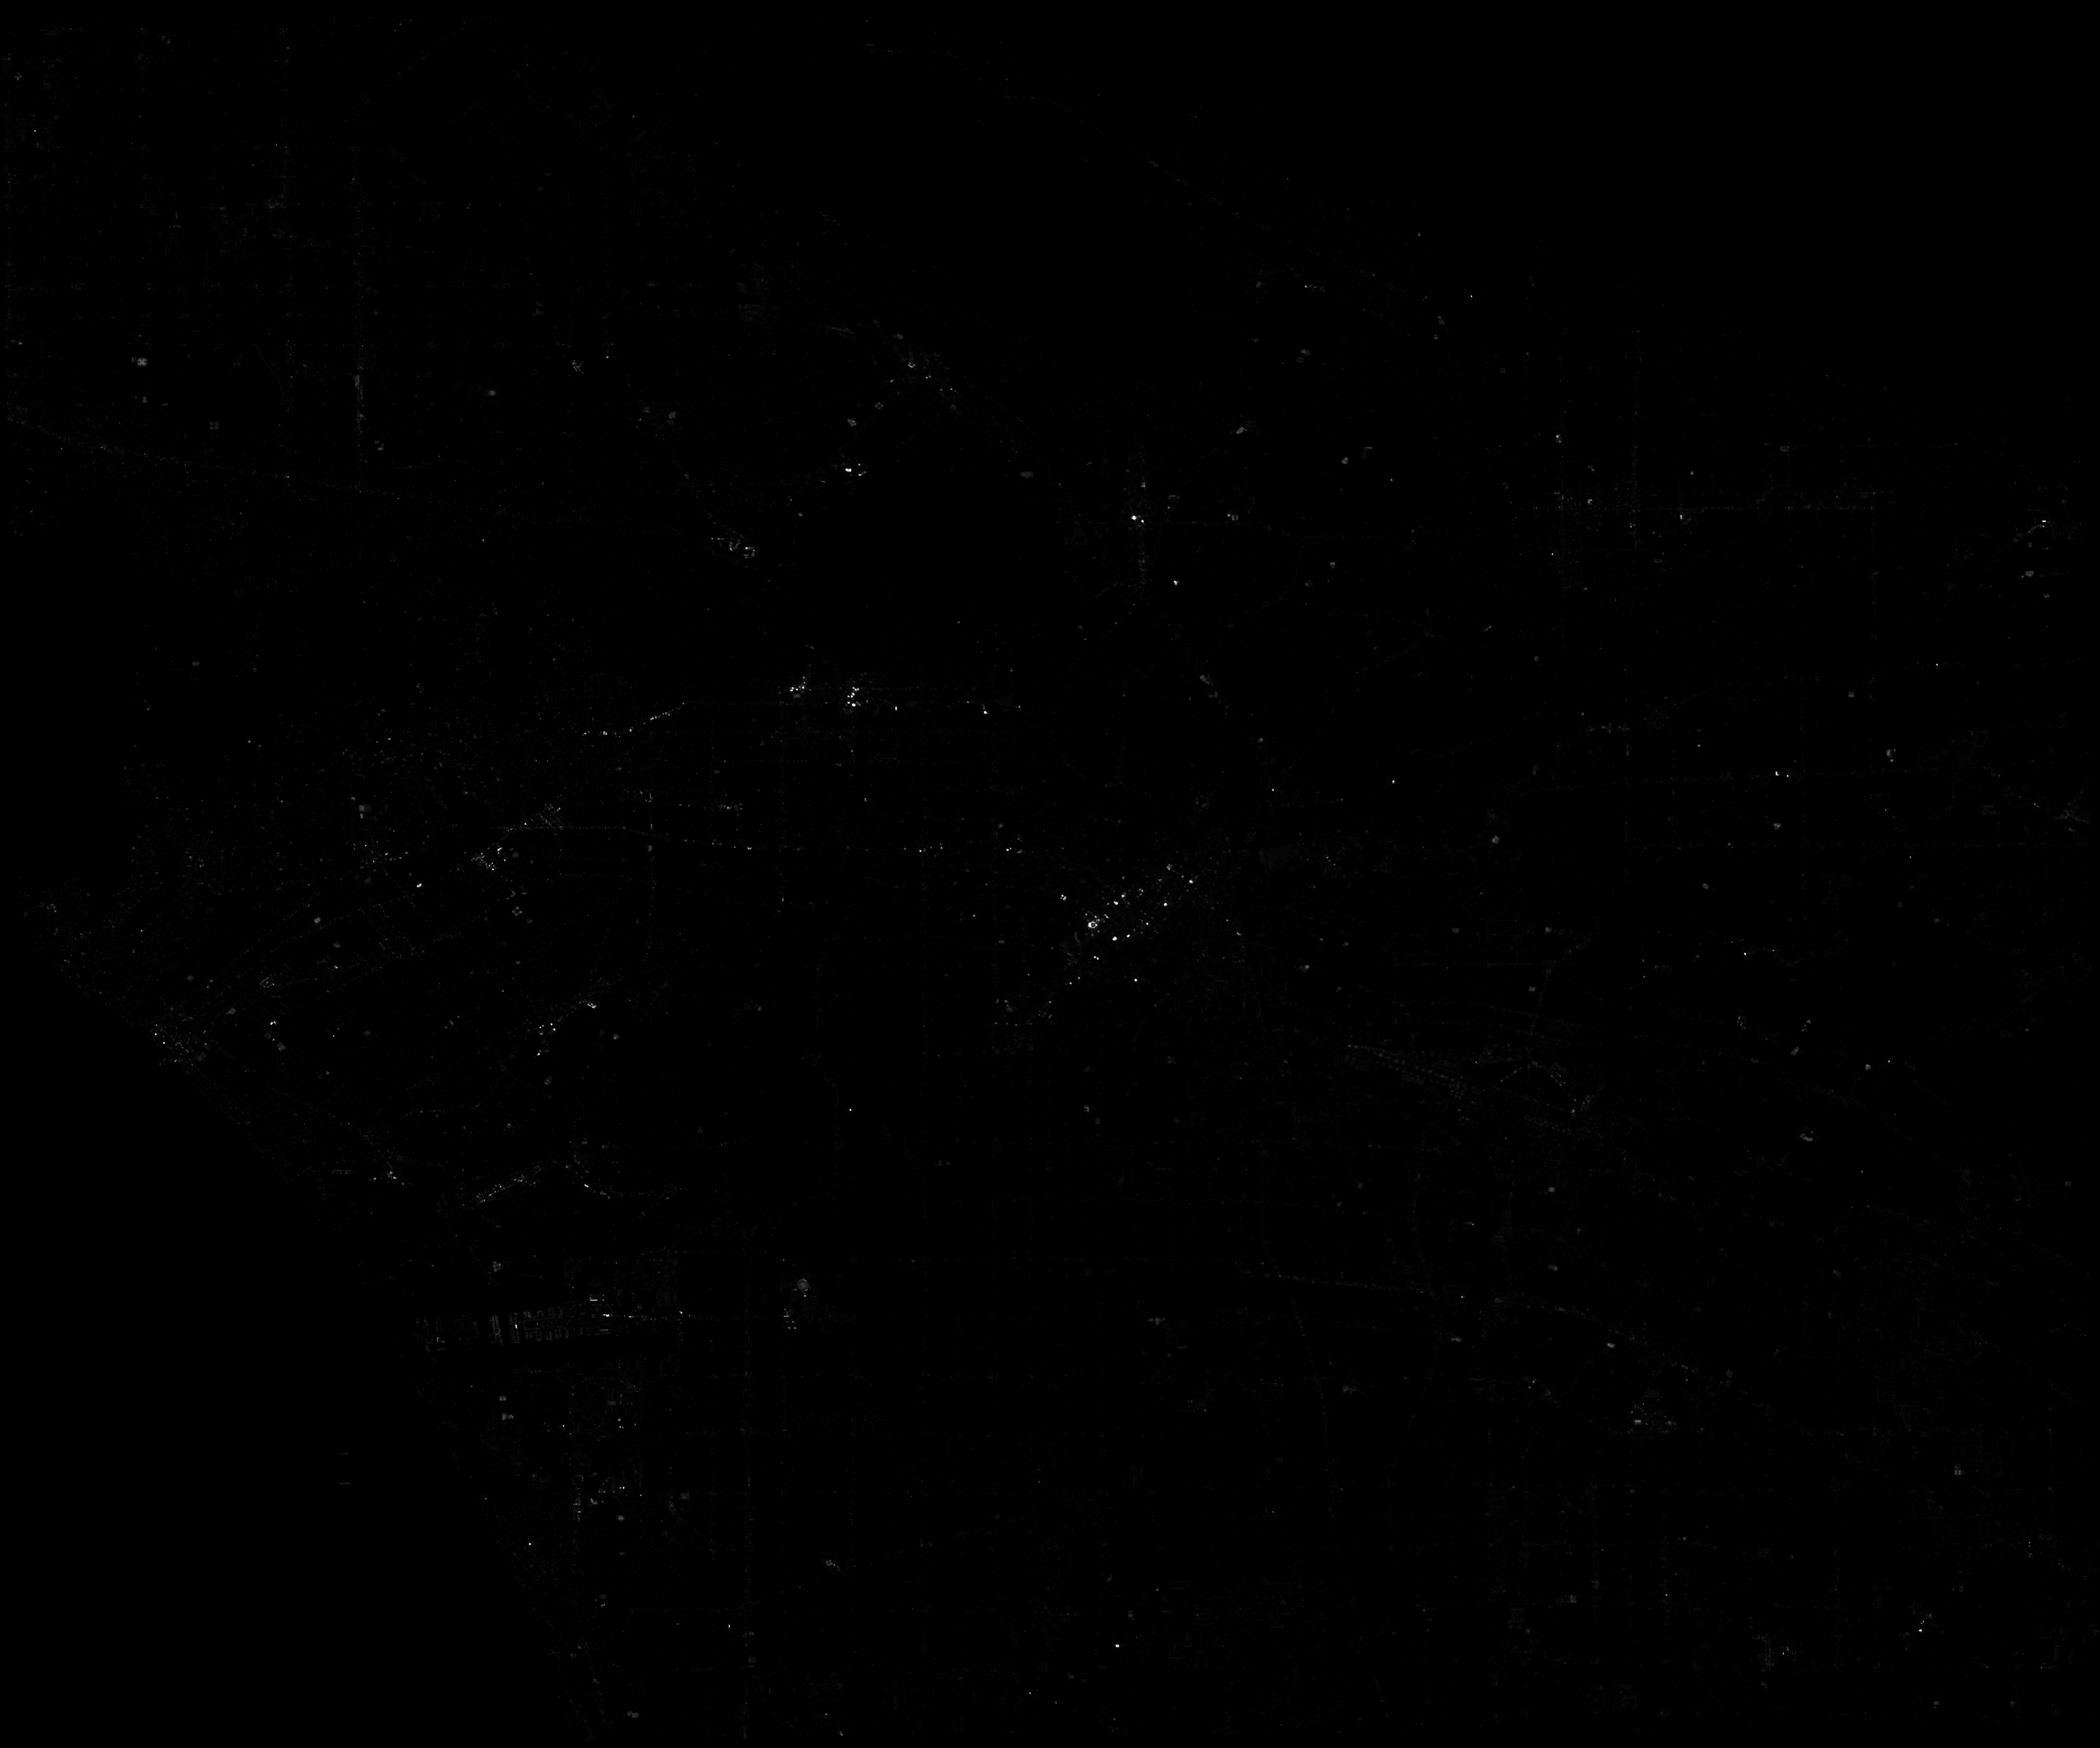

In [12]:
m

In [13]:
m.get_bounds()

[[33.838334018501946, -118.53801269612491],
 [34.27207354554239, -118.01706575151047]]

In [14]:
gdf.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"fid": 1.0}, "geometry": {"type": "Polygon", "coordinates": [[[-118.2441711948134, 34.26997900808266], [-118.01977115173726, 34.08788472733296], [-118.31051944625804, 33.84077240065848], [-118.5334739335343, 34.02118589999127], [-118.2441711948134, 34.26997900808266]]]}}]}'

In [15]:
print(sdgsat_df.rio.crs)

EPSG:4326


In [16]:
min_lon, min_lat, max_lon, max_lat = sdgsat_df.rio.bounds()
raster_bounds = [[min_lat, min_lon], [max_lat, max_lon]]

In [17]:
raster_bounds

[[33.838334018501946, -118.53801269612491],
 [34.27207354554239, -118.01706575151047]]

In [18]:
sdgsat_df = sdgsat_df.rio.write_crs("EPSG:3857")  # or the correct EPSG code for your data
sdgsat_df_ll = sdgsat_df.rio.reproject("EPSG:4326")

In [19]:
print(sdgsat_df_ll.x)
print(sdgsat_df_ll.y)

<xarray.DataArray 'x' (x: 5215)> Size: 42kB
array([-0.001065, -0.001065, -0.001065, ..., -0.00106 , -0.00106 , -0.00106 ],
      shape=(5215,))
Coordinates:
  * x            (x) float64 42kB -0.001065 -0.001065 ... -0.00106 -0.00106
    spatial_ref  int64 8B 0
Attributes:
    axis:           X
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east
<xarray.DataArray 'y' (y: 4342)> Size: 35kB
array([0.000308, 0.000308, 0.000308, ..., 0.000304, 0.000304, 0.000304],
      shape=(4342,))
Coordinates:
  * y            (y) float64 35kB 0.0003079 0.0003079 ... 0.000304 0.000304
    spatial_ref  int64 8B 0
Attributes:
    axis:           Y
    long_name:      latitude
    standard_name:  latitude
    units:          degrees_north


In [20]:
print(sdgsat_df_ll.rio.bounds())

(-0.001064845085540829, 0.00030397492636847324, -0.0010601653395168607, 0.00030787127483176567)
